# Chaos in the Hénon-Heiles system

$$
H = \frac{1}{2} ( p_x^2 + p_y^2 ) + \frac{1}{2} (x^2 + y^2) + x^2y - \frac{1}{3}y^3
$$

$$
\dot{x} = p_x \\
\dot{y} = p_y \\
\dot{p}_x = - x - 2xy \\
\dot{p}_y = -y -x^2 + y^2
$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt

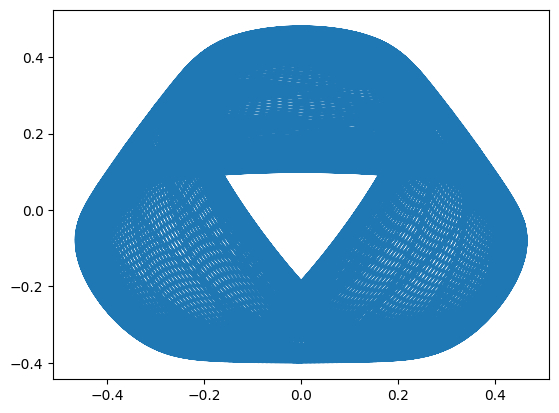

In [27]:
def rk4(func, coords, dt):

    k_1 = dt * func(coords)
    k_2 = dt * func(coords + (1 / 2) * np.array(k_1))
    k_3 = dt * func(coords + (1 / 2) * np.array(k_2))
    k_4 = dt * func(coords + np.array(k_3))

    return coords + (1 / 6) * (
        np.array(k_1) + 2 * np.array(k_2) + 2 * np.array(k_3) + np.array(k_4)
    )

def henon_heiles(coords):
    return np.array([
        coords[2],
        coords[3],
        - coords[0] - 2 * coords[0] * coords[1],
        - coords[1] - coords[0] ** 2 + coords[1] ** 2
    ])

# Evolution Parameters

T = 1000
tau = 0.1

# Initial Conditions
H = 0.125
x, y, py = 0, 0.1, 0
px = np.sqrt( 2 * H - 2 * x ** 2 * y + (2 / 3) * y ** 3 - py ** 2 - x**2 - y**2)

# Simulation

steps = int(T / tau)
coords = np.array([x, y, px, py])

trajectory = np.empty((steps, len(coords)))

trajectory[0] = coords

for i in range(1, steps):
    coords = rk4(
        henon_heiles,
        coords,
        tau,
    )
    trajectory[i] = coords

plt.plot(trajectory[:,0], trajectory[:,1])
plt.show()